## PREDICTION BY LOGISTIC REGRESSION

In [13]:
# Logistic Regression
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [3]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   -------------------------- ------------- 194.6/294.9 kB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\saxen\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import seaborn as sb
%matplotlib inline

In [103]:
db=pd.read_csv('Groundwater.csv')


In [104]:
db.head()

,States,Recharge from rainfallMonsoon season,Recharge from other sources,Recharge from rainfallNon-monsoon season,Recharge from other sources.1,Total_Rainfall,Natural discharge during non-monsoon season,Net annual groundwater availability,Irrigation,Domestic and industrial uses,Total_Usage,Projected demand for domestic and industrial uses upto 2025,Groundwater availability for future irrigation use,Situation
0,Andhra Pradesh,15.1,6.5000,5.5,6.7000,33.8,3.1,30.8,12.600,1.500,14.200,2.70,15.9,EXCESS
1,Arunachal Pradesh,3.4,0.0003,1.0,0.0004,4.5,0.5,4.0,0.002,0.001,0.003,0.01,4.0,SEMICRITICAL
2,Assam,19.0,2.2000,8.6,0.6000,30.4,2.5,27.8,5.300,0.700,6.000,1.00,21.5,EXCESS
3,Bihar,18.9,3.9000,3.4,2.4000,28.6,2.4,26.2,9.800,1.600,11.400,2.60,13.9,MODERATED
4,Chhattisgarh,9.9,0.6000,0.9,0.9000,12.2,0.6,11.6,3.100,0.500,3.600,0.60,7.9,MODERATED


## NUMBER OF STATES REPRESENTATION 

<Axes: xlabel='Situation', ylabel='count'>

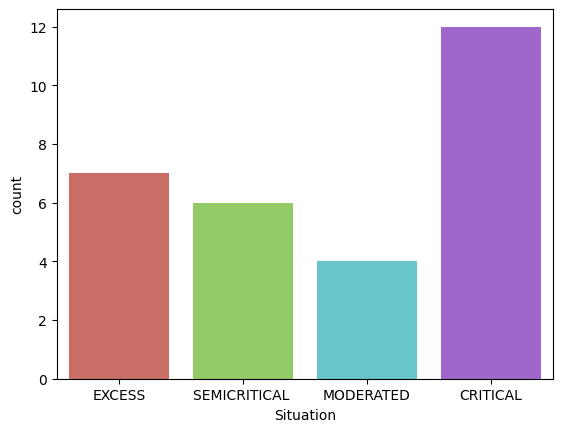

In [106]:
sns.countplot(x='Situation', hue='Situation', data=db, palette='hls', legend=False)

# Test the Data Through LabelEncoder

In [10]:
X=db.iloc[:,[5,6,7,10,11,12]].values
Y=db.iloc[:, 13].values

In [11]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)


In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [16]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [19]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [21]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [107]:
print(cm)

[[12  0]
 [ 1  3]]


# ACCURACY

In [22]:
classifier.score(X_test, Y_test)

0.5

In [23]:
classifier.score(X_train, Y_train)

0.8571428571428571

#### Accuracy is less due to underfitting; need to manufacture more data using dummy variable

# USE OF DUMMY VARIABLE

In [24]:
Availabilty = pd.get_dummies(db['Situation'],drop_first=True)
Availabilty.head()

,EXCESS,MODERATED,SEMICRITICAL
0,True,False,False
1,False,False,True
2,True,False,False
3,False,True,False
4,False,True,False


In [25]:
db.drop(['Situation'],axis=1,inplace=True)
db.head()

,States,Recharge from rainfallMonsoon season,Recharge from other sources,Recharge from rainfallNon-monsoon season,Recharge from other sources.1,Total_Rainfall,Natural discharge during non-monsoon season,Net annual groundwater availability,Irrigation,Domestic and industrial uses,Total_Usage,Projected demand for domestic and industrial uses upto 2025,Groundwater availability for future irrigation use
0,Andhra Pradesh,15.1,6.5000,5.5,6.7000,33.8,3.1,30.8,12.600,1.500,14.200,2.70,15.9
1,Arunachal Pradesh,3.4,0.0003,1.0,0.0004,4.5,0.5,4.0,0.002,0.001,0.003,0.01,4.0
2,Assam,19.0,2.2000,8.6,0.6000,30.4,2.5,27.8,5.300,0.700,6.000,1.00,21.5
3,Bihar,18.9,3.9000,3.4,2.4000,28.6,2.4,26.2,9.800,1.600,11.400,2.60,13.9
4,Chhattisgarh,9.9,0.6000,0.9,0.9000,12.2,0.6,11.6,3.100,0.500,3.600,0.60,7.9


##  concatenate the original DataFrame 'db' with the dummy variables 'Availabilty'.

In [26]:
new_data = pd.concat([db,Availabilty],axis=1)
new_data.head()

,States,Recharge from rainfallMonsoon season,Recharge from other sources,Recharge from rainfallNon-monsoon season,Recharge from other sources.1,Total_Rainfall,Natural discharge during non-monsoon season,Net annual groundwater availability,Irrigation,Domestic and industrial uses,Total_Usage,Projected demand for domestic and industrial uses upto 2025,Groundwater availability for future irrigation use,EXCESS,MODERATED,SEMICRITICAL
0,Andhra Pradesh,15.1,6.5000,5.5,6.7000,33.8,3.1,30.8,12.600,1.500,14.200,2.70,15.9,True,False,False
1,Arunachal Pradesh,3.4,0.0003,1.0,0.0004,4.5,0.5,4.0,0.002,0.001,0.003,0.01,4.0,False,False,True
2,Assam,19.0,2.2000,8.6,0.6000,30.4,2.5,27.8,5.300,0.700,6.000,1.00,21.5,True,False,False
3,Bihar,18.9,3.9000,3.4,2.4000,28.6,2.4,26.2,9.800,1.600,11.400,2.60,13.9,False,True,False
4,Chhattisgarh,9.9,0.6000,0.9,0.9000,12.2,0.6,11.6,3.100,0.500,3.600,0.60,7.9,False,True,False


In [27]:
X=new_data.iloc[:,[5,6,7,10,11,12]].values
Y=new_data.iloc[:, 13].values

In [29]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.55, random_state=0)

In [30]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=25)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=25)

In [32]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [33]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [34]:
cm

array([[12,  0],
       [ 1,  3]], dtype=int64)

# ACCURACY

In [35]:
test=classifier.score(X_test, Y_test)

In [37]:
test

0.9375

In [38]:
train=classifier.score(X_train, Y_train)

In [40]:
train

1.0

In [41]:
new_data.describe()

,Recharge from rainfallMonsoon season,Recharge from other sources,Recharge from rainfallNon-monsoon season,Recharge from other sources.1,Total_Rainfall,Natural discharge during non-monsoon season,Net annual groundwater availability,Irrigation,Domestic and industrial uses,Total_Usage,Projected demand for domestic and industrial uses upto 2025,Groundwater availability for future irrigation use
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,8.490690,2.328976,1.563793,2.474152,14.846207,1.210483,13.644483,7.631724,0.758021,8.392048,1.063483,5.292414
std,9.909697,3.420270,2.139700,3.733489,16.931169,1.448532,15.538660,10.802838,0.798408,11.440317,1.172055,7.782267
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000200,0.000400,0.001000,-14.600000
25%,1.000000,0.010000,0.200000,0.100000,1.200000,0.100000,1.100000,0.100000,0.030000,0.200000,0.100000,0.400000
50%,4.800000,0.700000,0.800000,0.900000,10.500000,0.600000,9.800000,3.100000,0.700000,3.600000,0.800000,3.000000
75%,12.200000,2.700000,1.900000,3.500000,22.900000,2.000000,20.700000,11.900000,1.100000,13.000000,1.700000,11.900000
max,40.800000,11.400000,8.600000,17.700000,75.300000,6.700000,68.600000,46.000000,3.500000,49.500000,5.400000,21.500000


# GRAPH,PIE CHARTS PLOT

In [42]:
import seaborn as sb
%matplotlib inline

<Axes: xlabel='EXCESS', ylabel='count'>

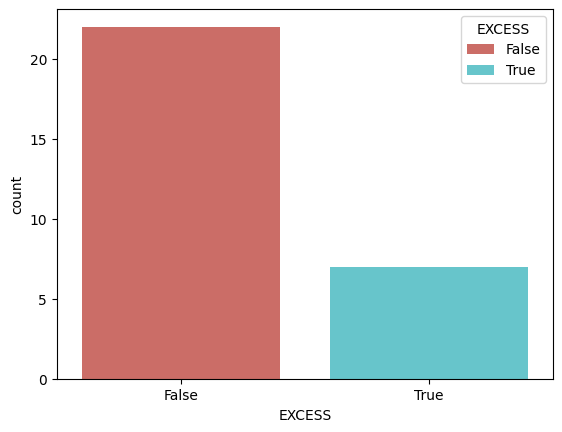

<Axes: xlabel='MODERATED', ylabel='count'>

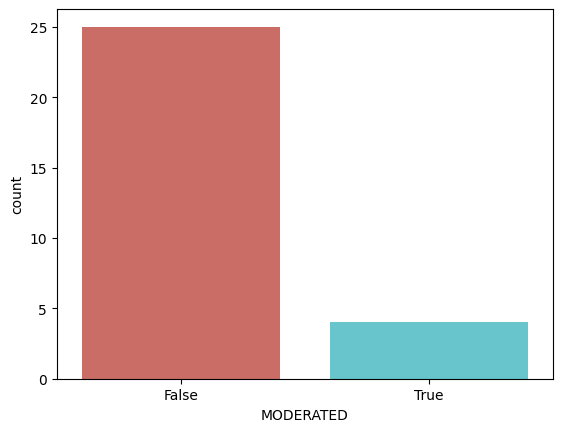

In [92]:
sns.countplot(x='MODERATED', hue='MODERATED', data=new_data, palette='hls', legend=False)

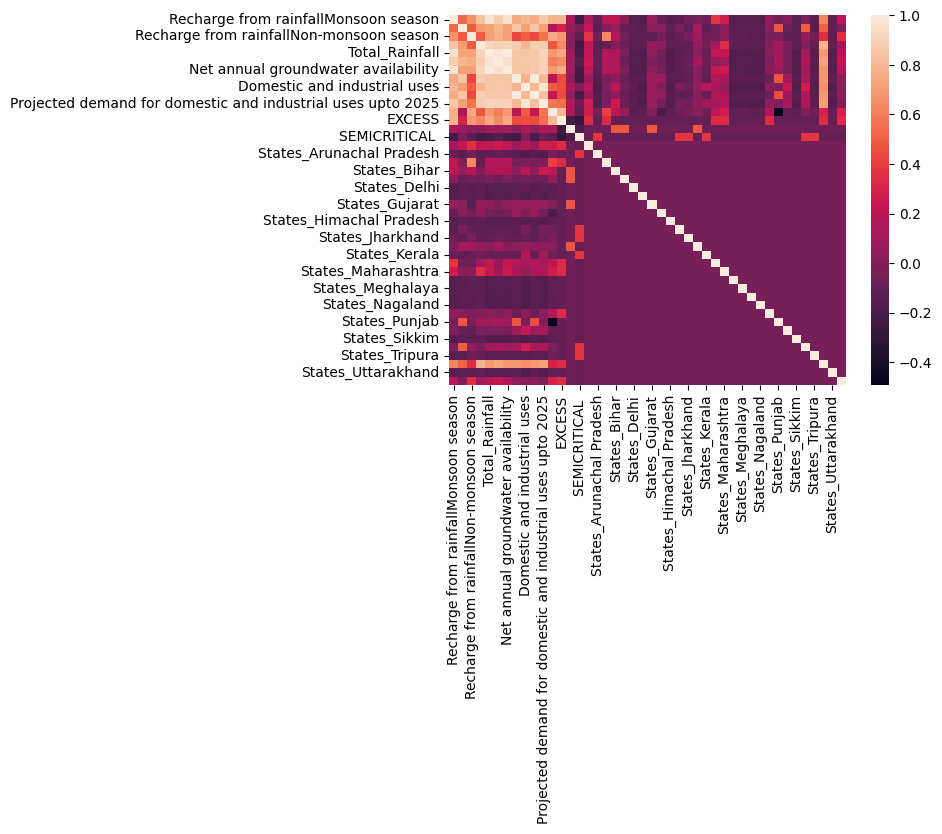

In [48]:
new_data_encoded = pd.get_dummies(new_data)

correlation_matrix = new_data_encoded.corr()

sns.heatmap(correlation_matrix)
plt.show()

## PIECHART REPRESENTATION FOR NET ANNUM GROUND WATER

In [49]:
labels='Total Rainfall','Net Annual GroundWater','Total Use','Future Available','Projected demand for domestic and industrial uses upto 2025','Natural discharge during non-monsoon season'
sizes=[14.84,13.64,8.39,5.29,1.063483,1.210483]
cols = ['c','m','r','b','g','y']

([<matplotlib.patches.Wedge at 0x22c4d4ba680>,
 [Text(-0.9537411719150084, 0.5480673106418469, 'Total Rainfall'),
  Text(-0.08733339820968328, -1.1065590257899254, 'Net Annual GroundWater'),
  Text(1.1053078027537007, -0.10195421115278551, 'Total Use'),
  Text(0.7113105849433492, 0.8521368738339814, 'Future Available'),
  Text(0.2926496966968201, 1.1637680847244691, 'Projected demand for domestic and industrial uses upto 2025'),
  Text(0.11112363521941154, 1.2952418838563027, 'Natural discharge during non-monsoon season')],
 [Text(-0.5202224574081863, 0.29894580580464375, '33.4%'),
  Text(-0.04799402964676288, -0.6081090141728419, '30.7%'),
  Text(0.6074214051168985, -0.05602889081369293, '18.9%'),
  Text(0.39090041154544414, 0.4682914351700257, '11.9%'),
  Text(0.17071232307314507, 0.6788647160892737, '2.4%'),
  Text(0.06838377551963787, 0.7970719285269554, '2.7%')])

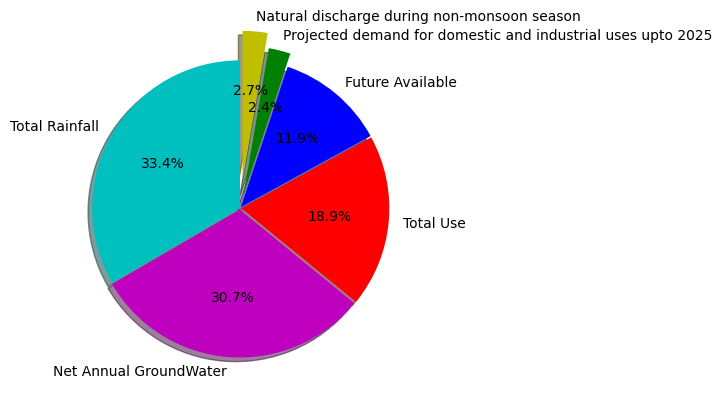

In [50]:
plt.pie(sizes,labels=labels,colors=cols,startangle=90,shadow=True,explode=(0,0.01,0.01,0.01,0.1,0.2),autopct='%1.1f%%')



## SCATTER PLOTS

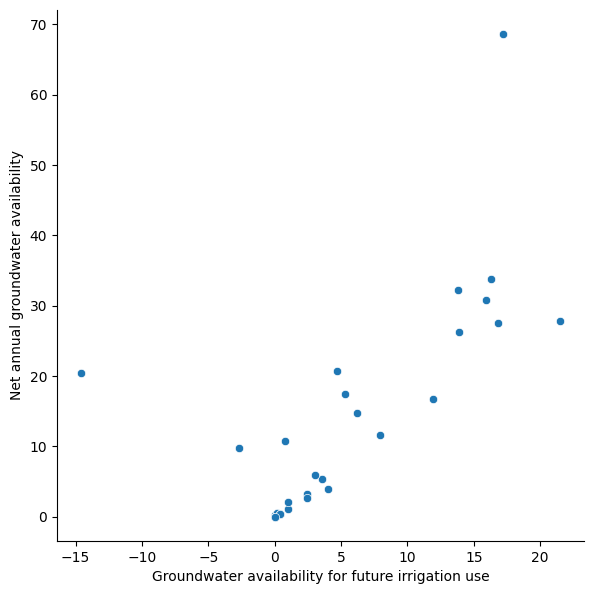

In [93]:
sns.pairplot(new_data, x_vars='Groundwater availability for future irrigation use', 
             y_vars='Net annual groundwater availability', 
             kind='scatter', diag_kind='hist', height=6.0)

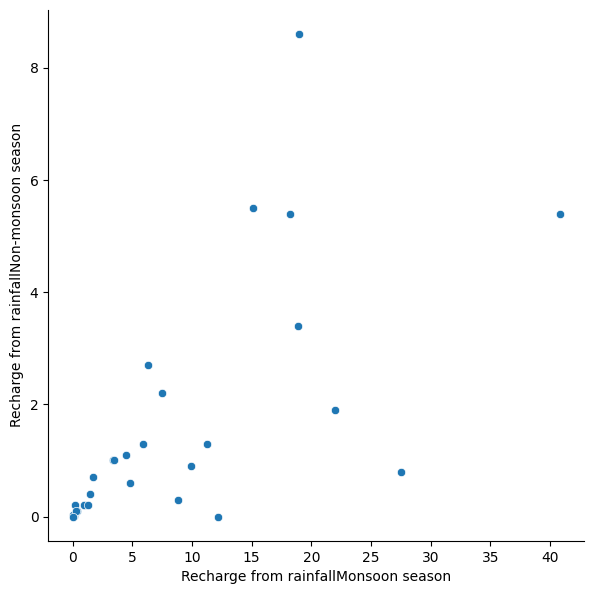

In [94]:
sns.pairplot(new_data, x_vars='Recharge from rainfallMonsoon season', 
             y_vars='Recharge from rainfallNon-monsoon season', 
             kind='scatter', diag_kind='hist', height=6.0)


## PIECHART REPRESENT THE SITUATION IN % 

In [97]:
label='EXCESS','MODERATED','SEMI-CRITICAL','CRITICAL'
sizes=[7,4,6,6]
cols = ['c','m','r','b']

([<matplotlib.patches.Wedge at 0x22c52a15ba0>,
 [Text(-0.9150062538795929, 0.6458819980160727, 'EXCESS'),
  Text(-0.700507679540436, -0.8610394827793171, 'MODERATED'),
  Text(0.7005075586159268, -0.8610395811587026, 'SEMI-CRITICAL'),
  Text(0.8185363453415478, 0.76445945043207, 'CRITICAL')],
 [Text(-0.5065213191119174, 0.3575418203303259, '30.4%'),
  Text(-0.3849636797474468, -0.4731838599057508, '17.4%'),
  Text(0.3849636132934372, -0.4731839139700978, '26.1%'),
  Text(0.4531183340283569, 0.4231829100606101, '26.1%')])

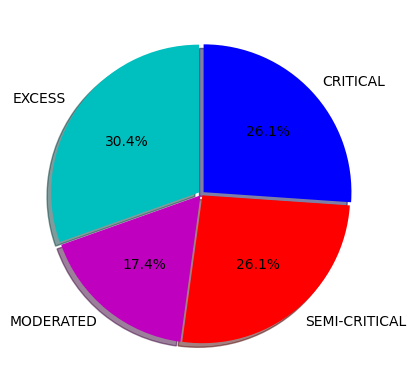

In [98]:
plt.pie(sizes,labels=label,colors=cols,startangle=90,shadow=True,explode=(0.02,0.01,0.01,0.02),autopct='%1.1f%%')



## DISTPLOT IN BTW TOTAL_RAINFALL,NET GROUNDWATER,RECHARGE IN MANSOON SEASON

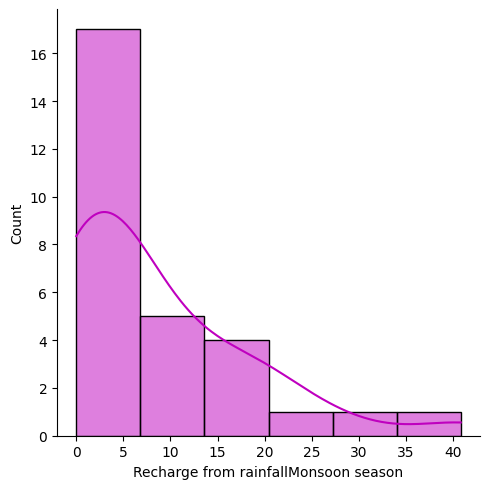

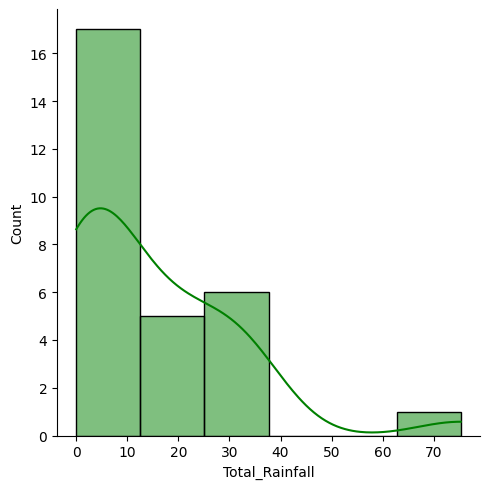

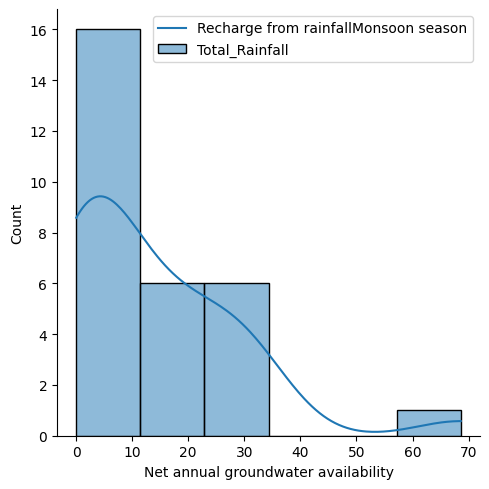

In [99]:
# Plotting the distributions
sns.displot(new_data['Recharge from rainfallMonsoon season'], color='m', kde=True)
sns.displot(new_data['Total_Rainfall'], color='g', kde=True)
sns.displot(new_data['Net annual groundwater availability'], kde=True)

# Adding legend
plt.legend(['Recharge from rainfallMonsoon season', 'Total_Rainfall', 'Net annual groundwater availability'])

# Show the plot
plt.show()

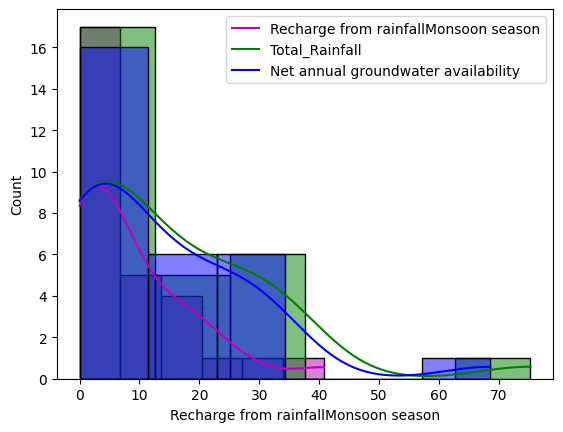

In [57]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plotting the distributions on the same axes
sns.histplot(new_data['Recharge from rainfallMonsoon season'], color='m', kde=True, ax=ax)
sns.histplot(new_data['Total_Rainfall'], color='g', kde=True, ax=ax)
sns.histplot(new_data['Net annual groundwater availability'], color='b', kde=True, ax=ax)

# Adding legend
plt.legend(['Recharge from rainfallMonsoon season', 'Total_Rainfall', 'Net annual groundwater availability'])

# Show the plot
plt.show()

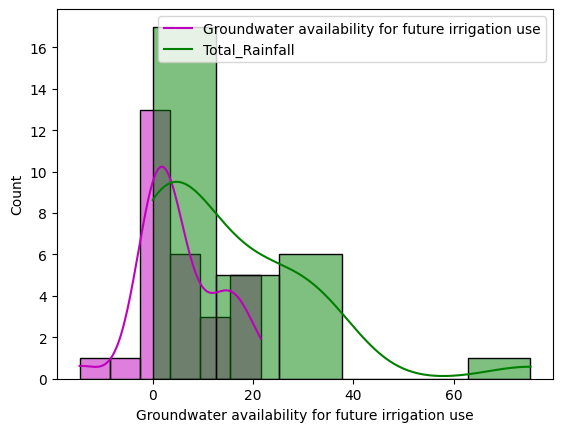

In [58]:
# Plotting the distributions
sns.histplot(new_data['Groundwater availability for future irrigation use'], color='m', kde=True)
sns.histplot(new_data['Total_Rainfall'], color='g', kde=True)

# Adding legend
plt.legend(['Groundwater availability for future irrigation use', 'Total_Rainfall'])

# Show the plot
plt.show()

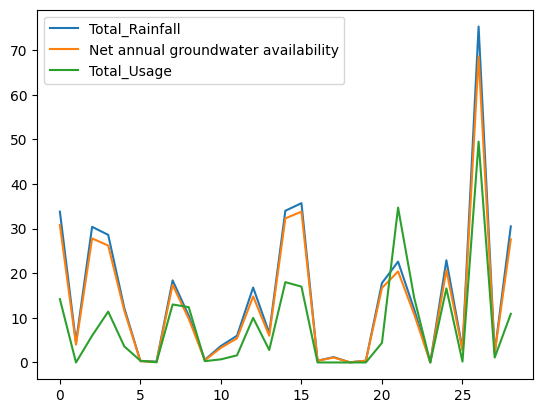

In [59]:
new_data["Total_Rainfall"].plot(kind='line')
new_data["Net annual groundwater availability"].plot()
new_data["Total_Usage"].plot()
plt.legend(['Total_Rainfall','Net annual groundwater availability','Total_Usage'])



# PREDICTING THROUGH DECISION TREE CLASSIFIER

In [60]:
from sklearn.tree import DecisionTreeClassifier


In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = .55, random_state=0)

In [62]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=ss.fit_transform(X)

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,test_size = .33)

In [64]:
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [65]:
tree.feature_importances_

array([0., 0., 1., 0., 0., 0.])

In [66]:
print("accuracy on training set: %f" % tree.score(X_train, Y_train))
print("accuracy on test set: %f" % tree.score(X_test, Y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.800000


In [50]:
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

print("accuracy on training set: %f" % tree.score(X_train, Y_train))
print("accuracy on test set: %f" % tree.score(X_test, Y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.900000


In [67]:
tree.feature_importances_

array([0., 0., 1., 0., 0., 0.])

In [68]:
features_names = new_data.columns
features_names

Index(['States', 'Recharge from rainfallMonsoon season',
       'Recharge from other sources',
       'Recharge from rainfallNon-monsoon season',
       'Recharge from other sources.1', 'Total_Rainfall',
       'Natural discharge during non-monsoon season',
       'Net annual groundwater availability', 'Irrigation',
       'Domestic and industrial uses', 'Total_Usage',
       'Projected demand for domestic and industrial uses upto 2025',
       'Groundwater availability for future irrigation use', 'EXCESS',
       'MODERATED', 'SEMICRITICAL '],
      dtype='object')

In [72]:
import graphviz as gp

# PREDICTING THROUGH RANDOM FOREST

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [80]:
X=new_data.iloc[:,[5,6,7,10,11,12]].values
y=new_data.iloc[:, 13].values

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, random_state=0)

In [82]:
random = RandomForestClassifier()
random.fit(X_train, y_train)

RandomForestClassifier()

In [83]:
print("accuracy on training set: %f" % random.score(X_train, y_train))
print("accuracy on test set: %f" % random.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.937500


In [84]:
random = RandomForestClassifier(max_leaf_nodes=10)
random.fit(X_train, y_train)

print("accuracy on training set: %f" % random.score(X_train, y_train))
print("accuracy on test set: %f" % random.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.937500


In [86]:
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier()
random.fit(X_train, y_train)

print("Accuracy on the training set: %f" % random.score(X_train, y_train))
print("Accuracy on the test set: %f" % random.score(X_test, y_test))


Accuracy on the training set: 1.000000
Accuracy on the test set: 0.937500


In [62]:
random = RandomForestClassifier(random_state=250)
random.fit(X_train, y_train)

print("accuracy on training set: %f" % random.score(X_train, y_train))
print("accuracy on test set: %f" % random.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.937500
